In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)
from sklearn.preprocessing import Imputer,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

/home/venkat/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Read in data into dataframes 
train_features = pd.read_csv('training_features.csv')
test_features = pd.read_csv('testing_features.csv')
train_labels = pd.read_csv('training_labels.csv')
test_labels = pd.read_csv('testing_labels.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (6622, 64)
Testing Feature Size:   (2839, 64)
Training Labels Size:   (6622, 1)
Testing Labels Size:    (2839, 1)


In [3]:
train_features.head()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Water Use (All Water Sources) (kgal),Latitude,Longitude,Community Board,Census Tract,log_Direct GHG Emissions (Metric Tons CO2e),log_Water Use (All Water Sources) (kgal),log_Longitude,Borough_Staten Island,Largest Property Use Type_Adult Education,Largest Property Use Type_Automobile Dealership,Largest Property Use Type_Bank Branch,Largest Property Use Type_College/University,Largest Property Use Type_Convenience Store without Gas Station,Largest Property Use Type_Courthouse,Largest Property Use Type_Distribution Center,Largest Property Use Type_Enclosed Mall,Largest Property Use Type_Financial Office,Largest Property Use Type_Hospital (General Medical & Surgical),Largest Property Use Type_Hotel,Largest Property Use Type_K-12 School,Largest Property Use Type_Library,...,Largest Property Use Type_Multifamily Housing,Largest Property Use Type_Museum,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Other,Largest Property Use Type_Other - Education,Largest Property Use Type_Other - Entertainment/Public Assembly,Largest Property Use Type_Other - Lodging/Residential,Largest Property Use Type_Other - Mall,Largest Property Use Type_Other - Public Services,Largest Property Use Type_Other - Recreation,Largest Property Use Type_Other - Services,Largest Property Use Type_Other - Specialty Hospital,Largest Property Use Type_Outpatient Rehabilitation/Physical Therapy,Largest Property Use Type_Parking,Largest Property Use Type_Performing Arts,Largest Property Use Type_Pre-school/Daycare,Largest Property Use Type_Refrigerated Warehouse,"Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Restaurant,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility
0,13276,5849784,90300.0,1950,1,100,5.2,1.2,7684.7,NaN,NaN,NaN,NaN,6.088818,8.946987,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7377,4398442,52000.0,1926,1,100,4.7,0.9,NaN,40.835496,-73.887745,3.0,161.0,5.384036,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9479,4665374,104700.0,1954,1,100,3.8,0.3,NaN,40.663206,-73.949469,9.0,329.0,5.017280,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14774,3393340,129333.0,1992,1,100,16.9,1.1,NaN,40.622968,-74.078742,1.0,27.0,6.510853,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3286,2704325,109896.0,1927,1,100,3.5,0.0,3493.9,40.782421,-73.972622,7.0,165.0,6.123589,8.158774,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


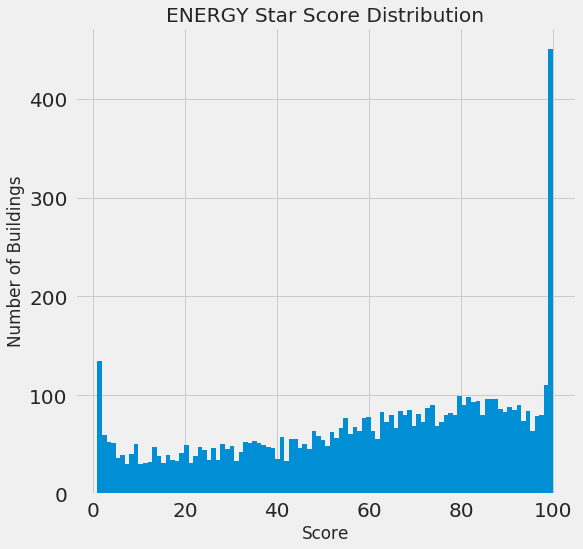

In [12]:
figsize(8,8)
plt.hist(train_labels['score'].dropna(),bins=100)


plt.style.use('fivethirtyeight')
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('ENERGY Star Score Distribution');

In [18]:
#proceeding with model
#imputation
imputer=Imputer(strategy='median')
imputer.fit(train_features)
X=imputer.transform(train_features)
X_test=imputer.transform(test_features)

In [21]:
print('missing values in training set',np.sum(np.isnan(X)))
print('missing values in test set',np.sum(np.isnan(X_test)))

missing values in training set 0
missing values in test set 0


In [23]:
#make sure all values are finite
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [24]:
#now scaling
scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X=scaler.transform(X)
X_test=scaler.transform(X_test)

In [41]:
y=np.array(train_labels).reshape((-1,))
y_test=np.array(test_labels).reshape((-1,))

In [42]:
#now modelling with 
#Linear Regression
#Support Vector Machine Regression
#Random Forest Regression
#Gradient Boosting Regression
#K-Nearest Neighbors Regression

In [47]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))
def fit_evaluate(model):
    model.fit(X,y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae=mae(y_test,model_pred)
    return model_mae

In [50]:
lr=LinearRegression()
lr_mae=fit_evaluate(lr)
print("linear regression score is ",lr_mae)
svm=SVR(C=1000,gamma=0.1)
svm_mae=fit_evaluate(svm)
print("svm regression score is ",svm_mae)
rf=RandomForestRegressor(random_state=60)
rf_mae=fit_evaluate(rf)
print("RandomForest regression score is ",rf_mae)
gb=GradientBoostingRegressor(random_state=60)
gb_mae=fit_evaluate(gb)
print("GradientBoostingRegressor score is ",gb_mae)
knn=KNeighborsRegressor(n_neighbors=10)
knn_mae=fit_evaluate(knn)
print("KNeighborsRegressor score is ",knn_mae)

linear regression score is  17.80637158183526
svm regression score is  14.321603777345032


/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForest regression score is  12.507220852412821
GradientBoostingRegressor score is  12.9055492514704
KNeighborsRegressor score is  17.480556533990843


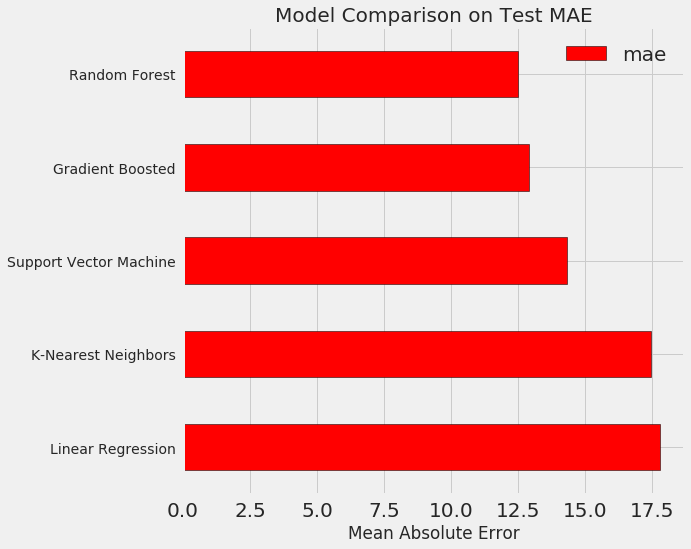

In [66]:
#comparing models


# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, rf_mae, 
                                         gb_mae, knn_mae]})

model_comparison.sort_values('mae',ascending=False).plot(x='model',y='mae',kind='barh',color='red',edgecolor='black')

plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 20)
plt.title('Model Comparison on Test MAE', size = 20);

In [68]:
#so now continuing with gradient boosted trees for hyper parameter selection
loss=['ls','lad','huber']
n_estimators=[100,500,900,1100,1500]
max_depth=[2,3,5,10,15]
min_samples_leaf=[1,2,4,6,8]
min_samples_split=[2,4,6,10]
max_features=['auto','sqrt','log2',None]
hyperparameter_grid={
    'loss':loss,
    'n_estimators':n_estimators,
    'max_depth':max_depth,
     'min_samples_leaf': min_samples_leaf,
     'min_samples_split': min_samples_split,
     'max_features': max_features
}

In [69]:
model=GradientBoostingRegressor(random_state=42)
random_cv=RandomizedSearchCV(estimator=model,
                        param_distributions=hyperparameter_grid,
                        n_iter=25,n_jobs=-1,cv=4,scoring='neg_mean_absolute_error',
                            verbose=1,return_train_score=True,random_state=42)

In [70]:
random_cv.fit(X,y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.9min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=25, n_jobs=-1,
          param_distributions={'loss': ['ls', 'lad', 'huber'], 'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 10], 'max_features': ['auto', 'sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=1)

In [72]:
random_results=pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score',ascending=False)
random_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
3,8.197943,0.140532,0.032420,0.019282,500,6,8,None,5,huber,"{'n_estimators': 500, 'min_samples_split': 6, ...",-11.020248,-10.856293,-11.461046,-10.941098,-11.069631,0.233260,1,-5.496906,-5.450620,-5.258317,-5.187328,-5.348293,0.128998
10,46.475791,0.777911,0.069561,0.002600,1100,10,6,None,10,huber,"{'n_estimators': 1100, 'min_samples_split': 10...",-11.239343,-10.924720,-11.504410,-10.985366,-11.163435,0.229507,2,-0.507762,-0.538632,-0.442082,-0.451245,-0.484930,0.039925
9,5.266660,0.225869,0.010695,0.000198,500,4,2,auto,3,huber,"{'n_estimators': 500, 'min_samples_split': 4, ...",-11.264585,-11.015668,-11.875887,-11.201065,-11.339241,0.322992,3,-8.691232,-8.822277,-8.554329,-8.617957,-8.671449,0.099648
2,28.222224,0.784644,0.035768,0.000522,500,4,2,auto,10,huber,"{'n_estimators': 500, 'min_samples_split': 4, ...",-11.255143,-11.251237,-11.697407,-11.291207,-11.373712,0.187496,4,-0.222607,-0.196636,-0.158992,-0.209742,-0.196994,0.023785
22,22.140006,0.324730,0.064566,0.023903,1500,2,8,None,5,ls,"{'n_estimators': 1500, 'min_samples_split': 2,...",-11.111717,-11.350397,-11.859587,-11.319845,-11.410333,0.275112,5,-2.162425,-2.085021,-2.107372,-1.901227,-2.064012,0.098114


In [73]:
random_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=8, min_samples_split=6,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             n_iter_no_change=None, presort='auto', random_state=42,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [76]:
#now we are focussing on the grid search only for no of estimators
trees_grid={'n_estimators':[100,200,300,400,500,600,700,800]}
model=GradientBoostingRegressor(loss='huber',max_depth=5,min_samples_split=6,min_samples_leaf=8,max_features=None,random_state=42)
grid_search=GridSearchCV(estimator=model,param_grid=trees_grid,cv=4,scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)


In [77]:
grid_search.fit(X,y)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:  1.1min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=8, min_sa...       subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [79]:
results=pd.DataFrame(grid_search.cv_results_)

(Text(0.5,0,'no of trees'),
 Text(0,0.5,'mae'),
 Text(0.5,1,'performance vs no of trees'))

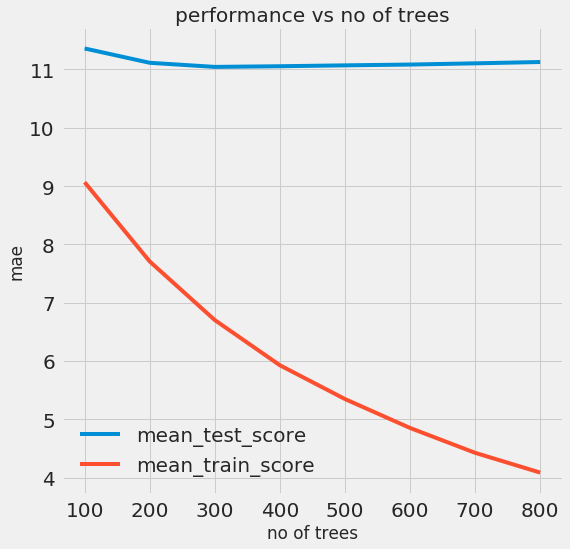

In [85]:
plt.plot(results['param_n_estimators'],-1*results['mean_test_score'])
plt.plot(results['param_n_estimators'],-1*results['mean_train_score'])
plt.xlabel('no of trees'),plt.ylabel('mae'),plt.legend(),plt.title('performance vs no of trees')

In [89]:
#this model is overfitting but fine
final_model=grid_search.best_estimator_
default_model=GradientBoostingRegressor(random_state=42)

In [91]:
%timeit final_model.fit(X,y)

4.99 s ± 143 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [92]:
%timeit default_model.fit(X,y)

746 ms ± 31.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [96]:
print('default model performance mae=%0.2f'%mae(y_test,default_model.predict(X_test)))
print('final model performance mae=%0.2f'%mae(y_test,final_model.predict(X_test)))

default model performance mae=12.91
final model performance mae=11.36


/home/venkat/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


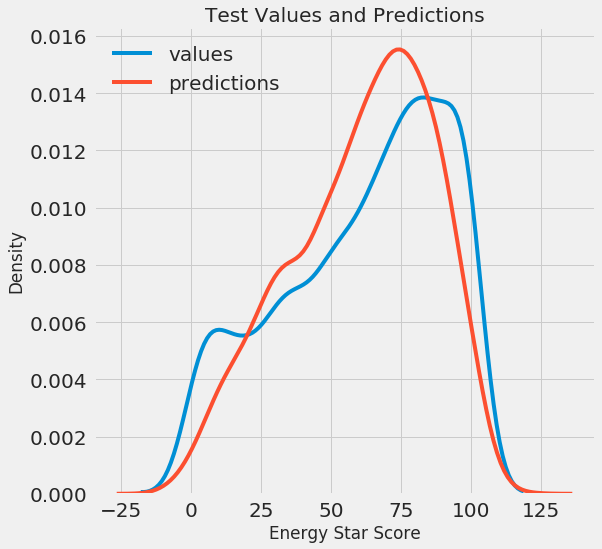

In [106]:
#to get the difference in predictions
final_pred=final_model.predict(X_test)
sns.kdeplot(y_test,label='values')
sns.kdeplot(final_pred,label='predictions')

# Label the plot
plt.xlabel('Energy Star Score'); plt.ylabel('Density');
plt.title('Test Values and Predictions');
#The distribution looks to be nearly the same although the density of the predicted values is closer to the median of the test values rather than to the actual peak at 100. 

Text(0.5,1,'distribution of residuals')

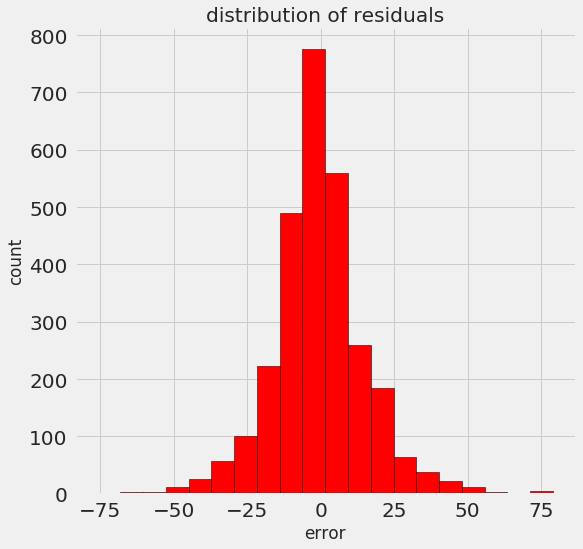

In [107]:
#historam of residuals
residuals=final_pred-y_test
plt.hist(residuals,color='red',bins=20,edgecolor='black')
plt.xlabel('error'),plt.ylabel('count')
plt.title('distribution of residuals')
#normal distributed residual shows model is wrong the same amountequally in both directions

(array([220., 156., 153., 212., 222., 252., 318., 383., 396., 527.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <a list of 10 Patch objects>)

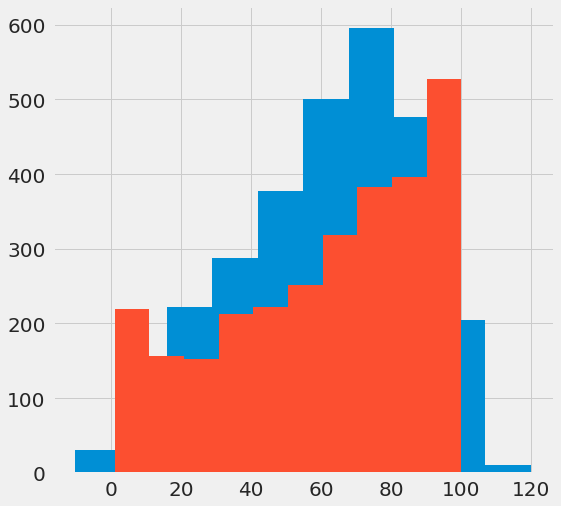

In [104]:
plt.hist(final_pred)
plt.hist(y_test)

In [111]:
#final_model
import pickle
filename='final_model.sav'
pickle.dump(final_model,open(filename,'wb'))